# [과제 3] 로지스틱 회귀분석
### - sklearn 패키지를 사용해 로지스틱 회귀분석을 진행해주세요.
### - 성능지표를 계산하고 이에 대해 해석해주세요.
### - 성능 개선을 시도해주세요. (어떠한 성능지표를 기준으로 개선을 시도했는지, 그 이유도 함께 적어주세요.)
### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

## Data

출처 : https://www.kaggle.com/mlg-ulb/creditcardfraud


* V1 ~ V28 : 비식별화 된 개인정보
* **Class** : Target 변수  
  - 1 : fraudulent transactions (사기)
  - 0 : otherwise

In [28]:
pip install imbalanced-learn

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from scipy.stats import zscore
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, roc_curve, auc

warnings.filterwarnings(action='ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_csv("/content/drive/MyDrive/tobigs/assignment3_creditcard.csv")

In [4]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.848212,2.384900,0.379573,1.048381,-0.845070,2.537837,-4.542983,-10.201458,-1.504967,-2.234167,...,2.585817,-5.291690,0.859364,0.423231,-0.506985,1.020052,-0.627751,-0.017753,0.280982,0
1,2.071805,-0.477943,-1.444444,-0.548657,0.010036,-0.582242,-0.042878,-0.247160,1.171923,-0.342382,...,-0.077306,0.042858,0.390125,0.041569,0.598427,0.098803,0.979686,-0.093244,-0.065615,0
2,-2.985294,-2.747472,1.194068,-0.003036,-1.151041,-0.263559,0.553500,0.635600,0.438545,-1.806488,...,1.345776,0.373760,-0.385777,1.197596,0.407229,0.008013,0.762362,-0.299024,-0.303929,0
3,-1.479452,1.542874,0.290895,0.838142,-0.529290,-0.717661,0.484516,0.545092,-0.780767,0.324804,...,0.038397,0.116771,0.405560,-0.116453,0.541275,-0.216665,-0.415578,0.027126,-0.150347,0
4,-0.281976,-0.309699,-2.162299,-0.851514,0.106167,-1.483888,1.930994,-0.843049,-1.249272,1.079608,...,-0.875516,-0.004199,1.015108,-0.026748,0.077115,-1.468822,0.751700,0.496732,0.331001,0


In [6]:
data.shape

(28678, 29)

In [7]:
#결측치 없음
data.isna().sum()

V1       0
V2       0
V3       0
V4       0
V5       0
V6       0
V7       0
V8       0
V9       0
V10      0
V11      0
V12      0
V13      0
V14      0
V15      0
V16      0
V17      0
V18      0
V19      0
V20      0
V21      0
V22      0
V23      0
V24      0
V25      0
V26      0
V27      0
V28      0
Class    0
dtype: int64

In [8]:
# class 값의 분포가 불균형함
print(data.iloc[:, 28].value_counts())

0    28432
1      246
Name: Class, dtype: int64


In [9]:
# train, test set 나눔
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 0:28], data.iloc[:, 28], test_size = 0.20, random_state = 0)

In [10]:
# 성능 평가를 위해 confusion matrix, precision, recall, accuracy 를 출력해주는 함수 생성
def evaluate(y_test, y_pred):
    conf_matrix = confusion_matrix(y_test, y_pred)

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    # confusion matrix 시각화
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

    # Create and return a dictionary with the evaluation metrics
    evaluation_metrics = {
        'precision': precision,
        'recall': recall,
        'accuracy': accuracy
    }

    return evaluation_metrics

In [11]:
print(y_train.value_counts())

0    22738
1      204
Name: Class, dtype: int64


In [12]:
print(y_test.value_counts())

0    5694
1      42
Name: Class, dtype: int64


In [13]:
# 로지스틱 회귀 모델 훈련
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

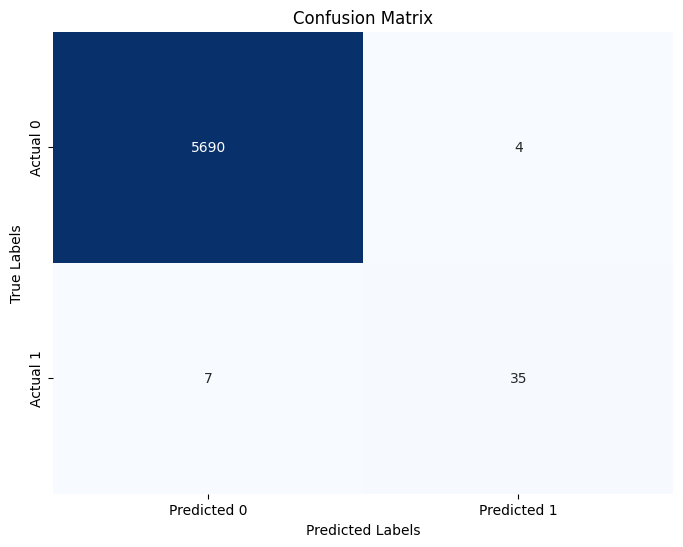

{'precision': 0.8974358974358975,
 'recall': 0.8333333333333334,
 'accuracy': 0.9980822873082287}

In [14]:
# class 값의 불균형으로 대체적으로 성능이 좋게 나오지만, recall을 향상할 필요 있음.
# 사기 거래 중, 가능한 많은 것을 감지하는 것을 목표로 함,
evaluate(y_test, y_pred)

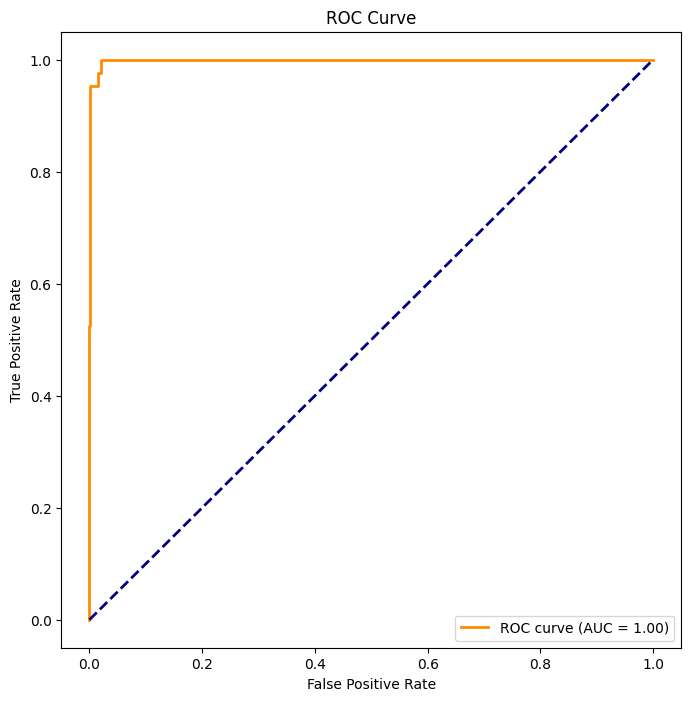

In [15]:
# ROC curve 생성 - 시각화를 통해 ROC curve가 좌상단에 위치하고 있음을 확인 가능
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [16]:
# 성능 개선을 위해 여러 임계값 적용 시도 - 임계값이 0.2일 때 recall 값이 가장 높음.

y_prob = model.predict_proba(X_test)[:, 1]  # 양성 클래스의 예측 확률을 사용

# 여러 임계값을 시도하여 성능을 비교
thresholds = [0.2, 0.3, 0.4, 0.5, 0.6]
for threshold in thresholds:
    y_pred = (y_prob > threshold).astype(int)  # 임계값 이상인 경우 1, 이하인 경우 0으로 변환
    conf_matrix = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print(f"Threshold: {threshold}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print()

Threshold: 0.2
Confusion Matrix:
[[5687    7]
 [   5   37]]
Precision: 0.8409090909090909
Recall: 0.8809523809523809

Threshold: 0.3
Confusion Matrix:
[[5688    6]
 [   7   35]]
Precision: 0.8536585365853658
Recall: 0.8333333333333334

Threshold: 0.4
Confusion Matrix:
[[5690    4]
 [   7   35]]
Precision: 0.8974358974358975
Recall: 0.8333333333333334

Threshold: 0.5
Confusion Matrix:
[[5690    4]
 [   7   35]]
Precision: 0.8974358974358975
Recall: 0.8333333333333334

Threshold: 0.6
Confusion Matrix:
[[5690    4]
 [   8   34]]
Precision: 0.8947368421052632
Recall: 0.8095238095238095



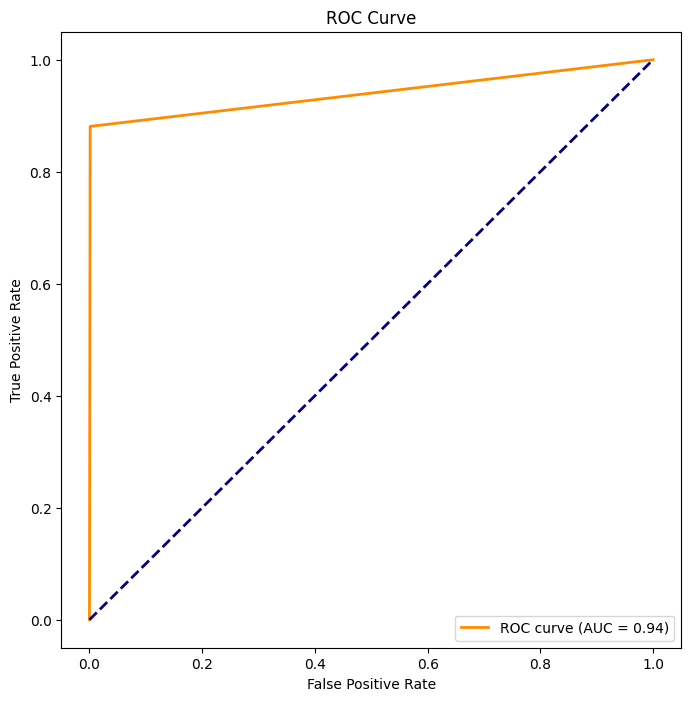

In [17]:
threshold = 0.2

# 해당 임계값에 대한 예측
y_pred = (y_prob > threshold).astype(int)

# 해당 임계값에 대한 ROC 커브 계산 - 성능 떨어짐
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [18]:
# 사기 데이터가 적으므로, class 간의 불균형을 해소하기 위해 SMOTE을 이용하여 데이터셋 확장
# SMOTE - 소수 클래스의 샘플들 사이에서 새로운 가상의 샘플을 생성 후 추가
# 샘플들을 선형 보간하거나 다차원 공간에서 유사한 이웃을 찾아 합성하는 방식으로 오버샘플링을 수행
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 0:28], data.iloc[:, 28], test_size = 0.20, random_state = 0)

smote = SMOTE(random_state=0)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

model = LogisticRegression(random_state=42)
model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_test)

# 성능 평가 - Recall은 향상했지만, Precision의 성능은 매우 나쁨. 정밀도와 재현율 간의 균형이 매우 깨져있는 상태
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Accuracy: {accuracy}")

Confusion Matrix:
[[5536  158]
 [   0   42]]
Precision: 0.21
Recall: 1.0
Accuracy: 0.9724546722454672


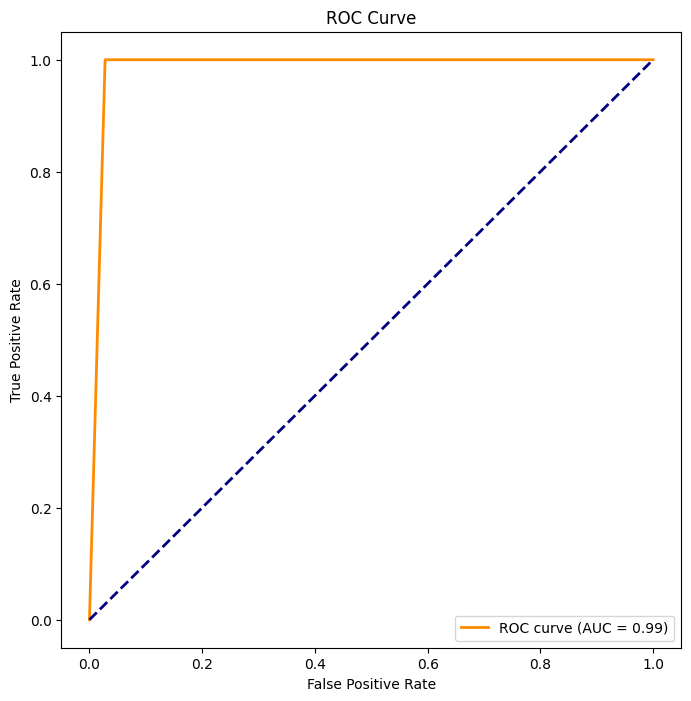

In [19]:
# ROC curve 또한 전보다 오른쪽으로 치우친 형태
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

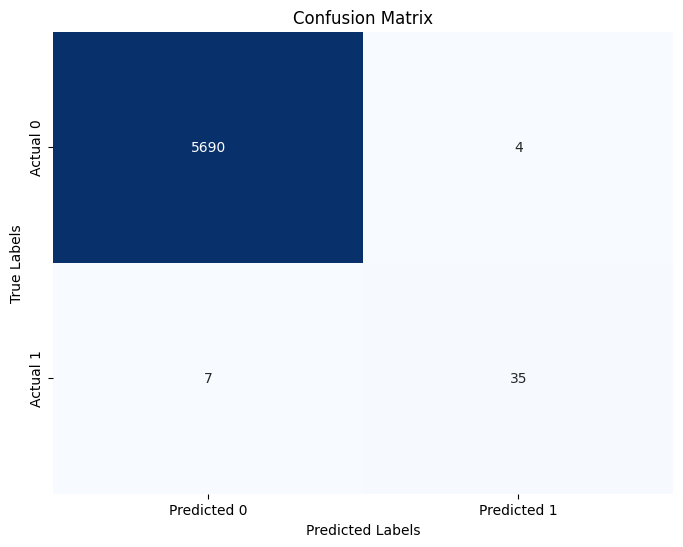

{'precision': 0.8974358974358975,
 'recall': 0.8333333333333334,
 'accuracy': 0.9980822873082287}

In [21]:
# L1 정규화 - 개선 x
model_l1 = LogisticRegression(penalty='l1', solver='liblinear', random_state=0)
model_l1.fit(X_train, y_train)
y_pred = model_l1.predict(X_test)

evaluate(y_test, y_pred)

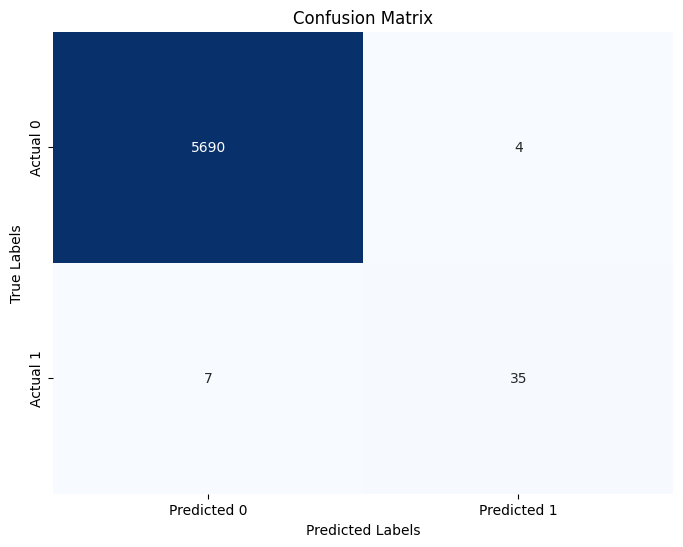

{'precision': 0.8974358974358975,
 'recall': 0.8333333333333334,
 'accuracy': 0.9980822873082287}

In [22]:
# L2 정규화 - 개선 x
model_l2 = LogisticRegression(penalty='l2', random_state=42)
model_l2.fit(X_train, y_train)
y_pred = model_l2.predict(X_test)

evaluate(y_test, y_pred)

In [23]:
X = data.drop('Class', axis=1)

# 특정 임계값 이상 또는 이하의 Z-Score를 가진 데이터를 이상치로 간주하여 제거
z_scores = zscore(X, axis=0)
threshold = 3
out = (np.abs(z_scores) > threshold).any(axis=1)

X_out = X[~out]

In [24]:
y = data['Class']

In [25]:
y_out = y[~out]

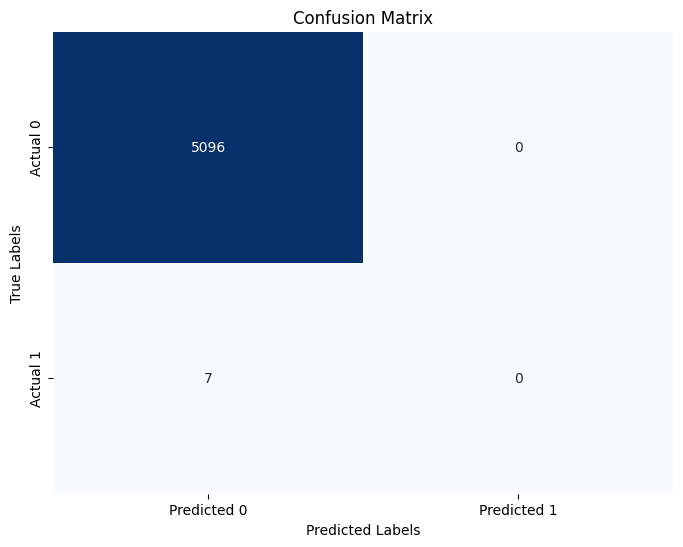

{'precision': 0.0, 'recall': 0.0, 'accuracy': 0.9986282578875172}

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_out, y_out, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 훈련
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 모델 평가 - 모든 class를 0으로 예측하여 정확도는 높지만, Precision과 Recall의 성능은 0임..
# 이상치가 모델의 중요한 정보를 담고 있음.
evaluate(y_test, y_pred)

In [27]:
# Cost-sensitive learning을 통해 모델이 각 클래스의 오분류 비용을 고려하여 학습

X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 0:28], data.iloc[:, 28], test_size = 0.20, random_state = 0)
model = LogisticRegression(class_weight='balanced')  # 'balanced' 옵션은 자동으로 클래스 빈도에 반비례하는 가중치를 부여
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

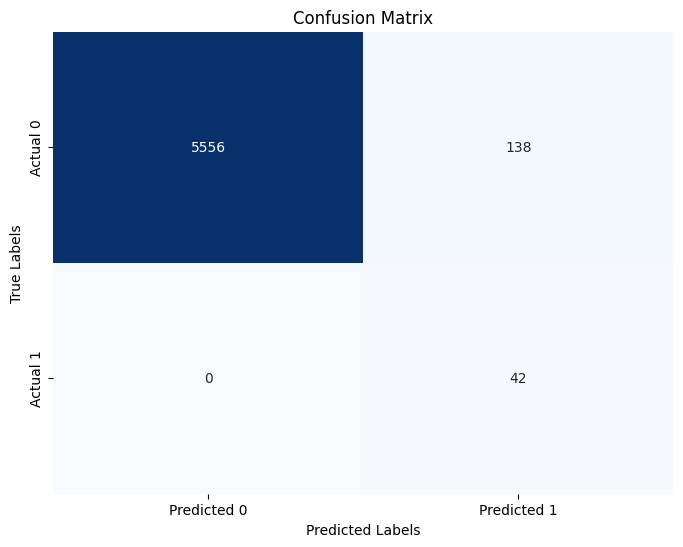

{'precision': 0.23333333333333334,
 'recall': 1.0,
 'accuracy': 0.9759414225941423}

In [28]:
# recall와 precision 간의 불균형 심함 - 성능 개선 x
y_pred = model.predict(X_test)
evaluate(y_test, y_pred)

다양한 모델 시도 결과, 모든 모델이 이전의 성능을 뛰어넘지 못했음.
성능 개선 시도가 효과를 나타내지 못함.





